In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair trading/notebooks/Orders_strat_1.csv')
stock=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/Pair trading/Returns data/sensex_close.csv')

In [4]:

jsw=df.iloc[-8:].copy()
jsw.index=range(8)
jsw['Date']=pd.to_datetime(jsw['Date'])

In [5]:

use=stock[['Date','RELIANCE.NS(close)','JSWSTEEL.NS(close)']].copy()
use['Date']=pd.to_datetime(use['Date'])

In [6]:
use['RELIANCE.NS(close)']=use['RELIANCE.NS(close)']/use['RELIANCE.NS(close)'][0]
use['JSWSTEEL.NS(close)']=use['JSWSTEEL.NS(close)']/use['JSWSTEEL.NS(close)'][0]
use

,Date,RELIANCE.NS(close),JSWSTEEL.NS(close)
0,2011-01-03,1.000000,1.000000
1,2011-01-04,1.020368,0.980354
2,2011-01-05,1.019136,0.963395
3,2011-01-06,1.028420,0.923138
4,2011-01-07,1.009284,0.864705
...,...,...,...
3199,2023-12-22,5.890295,8.425057
3200,2023-12-26,5.920148,8.395506
3201,2023-12-27,5.940356,8.627976
3202,2023-12-28,5.983298,8.676242


In [7]:
#generating signals
use=use.copy()

use['signal_jsw'] = 0
use['signal_reliance'] = 0

jsw_filtered = jsw[jsw['Stock'] == 'JSWSTEEL.NS'].copy()
reliance_filtered = jsw[jsw['Stock'] == 'RELIANCE.NS'].copy()

signal_dict = {'Buy': 1, 'Sell': -1}

for _, row in jsw_filtered.iterrows():
    date = row['Date']
    order = row['Order']
    use.loc[use['Date'] == date, 'signal_jsw'] = signal_dict.get(order, 0)

for _, row in reliance_filtered.iterrows():
    date = row['Date']
    order = row['Order']
    use.loc[use['Date'] == date, 'signal_reliance'] = signal_dict.get(order, 0)


In [8]:
jsw_filtered

,Date,Stock,Order,Price
0,2013-07-25,JSWSTEEL.NS,Buy,50.349342
3,2016-09-12,JSWSTEEL.NS,Sell,159.174622
5,2023-12-29,JSWSTEEL.NS,Buy,880.250000
6,2023-12-29,JSWSTEEL.NS,Sell,880.250000


In [9]:
#sort df by group and date  


In [10]:
profit = 0

for i in range(len(jsw)):
    if(jsw.iloc[i]['Order'] == 'Buy'):
        profit -= jsw.iloc[i]['Price']
    else:
        profit += jsw.iloc[i]['Price']

profit

27.09368133544922

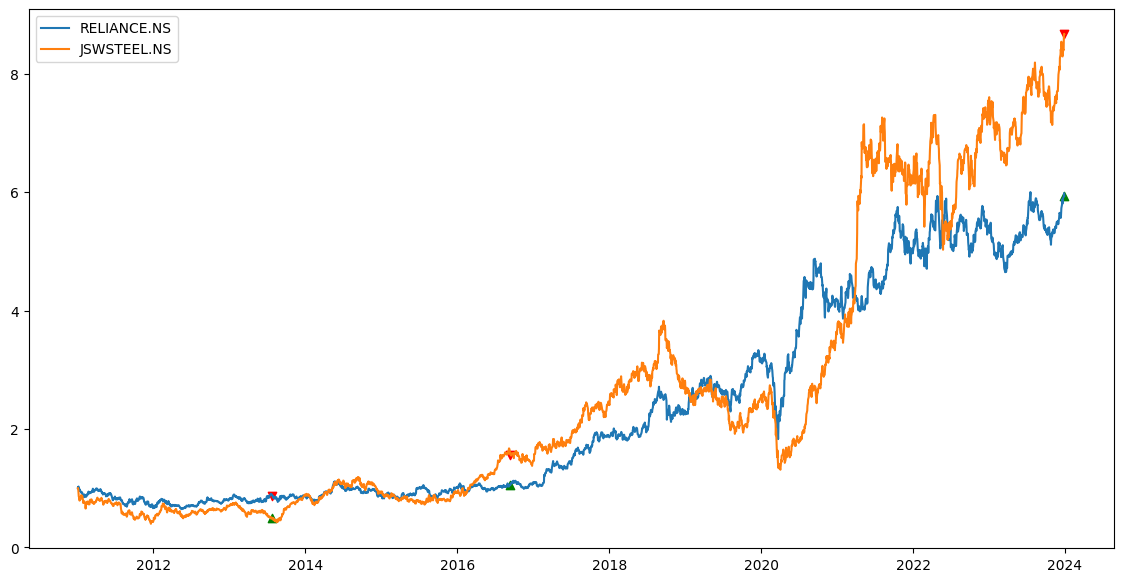

In [11]:
#plot signals for reliance and jsw on same graph
plt.figure(figsize=(14, 7))
plt.plot(use['Date'], use['RELIANCE.NS(close)'], label='RELIANCE.NS')
plt.plot(use['Date'], use['JSWSTEEL.NS(close)'], label='JSWSTEEL.NS')
plt.scatter(use[use['signal_reliance'] == 1]['Date'], use[use['signal_reliance'] == 1]['RELIANCE.NS(close)'], marker='^', color='g')
plt.scatter(use[use['signal_reliance'] == -1]['Date'], use[use['signal_reliance'] == -1]['RELIANCE.NS(close)'], marker='v', color='r')
plt.scatter(use[use['signal_jsw'] == 1]['Date'], use[use['signal_jsw'] == 1]['JSWSTEEL.NS(close)'], marker='^', color='g')
plt.scatter(use[use['signal_jsw'] == -1]['Date'], use[use['signal_jsw'] == -1]['JSWSTEEL.NS(close)'], marker='v', color='r')
plt.legend()
plt.show()

In [12]:
#plot standardised graph for all stocks groups

